## Visualizing nodes of knowledge graph from paper by Sovrano, Francesco & Palmirani, Monica & Vitali, Fabio. (2020). Legal Knowledge Extraction for Knowledge Graph Based Question-Answering. 10.3233/FAIA200858. 

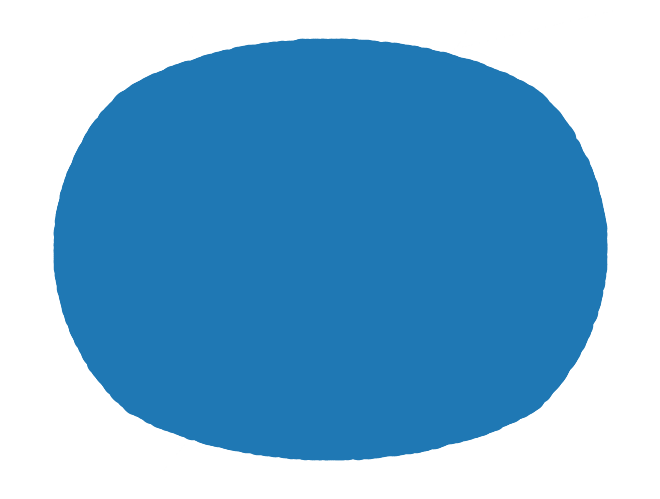

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_graphml('./graph.graphml')
nx.draw(G)
plt.show()

In [2]:
for node in G.nodes(data=True):
    print(node)

('my:law', {})
('my:contractual_obligation', {})
('the law', {})
('my:{subj}_applicable_to_{obj}', {})
('{subj} applicable to {obj}', {})
('contractual obligations', {})
('_:rome_i_en_source0', {})
('on the law applicable to contractual obligations (Rome I)', {})
('myfile:Rome_I_EN', {})
('my:regard_to_treaty_establish_european_community', {})
('my:article', {})
('regard to the treaty establishing the european community', {})
('my:have_{subj}_in_particular_{obj}_thereof', {})
('having {subj} , and in particular {obj} thereof', {})
('article', {})
('_:rome_i_en_source1', {})
('Having regard to the Treaty establishing the European Community, and in particular Article 61(c) and the second indent of Article 67(5) thereof,', {})
('my:regard', {})
('my:treaty_establish_european_community', {})
('regard', {})
('my:{subj}_to_{obj}', {})
('{subj} to {obj}', {})
('the treaty establishing the european community', {})
('my:second_indent', {})
('my:have_{subj}_in_particular_article_61(c_{obj}_there

In [7]:
list(G.edges)[:5]

[('my:law', 'my:contractual_obligation'),
 ('my:law', 'the law'),
 ('my:law', '_:rome_i_en_source0'),
 ('my:law', 'laws'),
 ('my:law', '_:rome_i_en_source10')]

### In detail, we perform KG extraction by:
1. Analysing the grammatical dependencies of tokens extracted by Spacy’s Dependency
Parser, 
- therefore identifying noun syntagms (concepts): the possible objects
- and subjects of the triples to extract.
2. Using the dependency tree to extract all the tokens connecting two different target
concepts in a sentence, thus building a template composed by these connecting
tokens (the order of the tokens is preserved) together with the target concepts
(replaced with the placeholders “{subj}” and “{obj}”, in accordance with their
grammatical dependencies).
3. Creating a graph of triples where target concepts are subjects/objects and templates
are predicates.

Resulting triples are a sort of function, 
the predicate is the body
object and the subject are the parameters

An example of template-triple (in the form subject, predicate, object):
- “the applicable law”
- “Surprisingly {subj} is considered to be clearly more related to {obj} rather than to something else.”
- “that Member State”

but the questions is are these phrases the subject, predicate-object-triples themselves all in all, or
each phrase are examples of the subject-predicate-object triples

Example 1:
<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
    <key id="d0" for="edge" attr.name="r" attr.type="string"/>
    <graph edgedefault="directed">
        ...
        <node id="REGULATION (EU) No 1215/2012 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL"/>
        <node id="_:brusselsreg_en_1215-20212_source208"/>
        ...
        <edge source="_:brusselsreg_en_1215-20212_source208" target="REGULATION (EU) No 1215/2012 OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL">
            <data key="d0">my:content</data>
        </edge>
        ...
    </graph>
</graphml>"


Example 2:
